# 타이타닉 데이터 분석

>이번 데이터 분석에서는 머신러닝 과정은 제외하고 시각화 까지만 진행합니다.
>
>그러나 머신러닝을 위해 필요한 과정은 진행합니다.

## 목차
1. 데이터 설명 및 보기
2. 데이터 기초 분석/탐색
3. 데이터 클린징
4. 데이터 시각화

## 1. 데이터 설명 및 보기
- 사용하는 데이터 이름: Titanic - Machine Learning from Disaster
- 데이터 출처: https://www.kaggle.com/c/titanic/

### 데이터 설명
Titanic - Machine Learning from Disaster 데이터는 아래와 같은 컬럼으로 이루어져 있다.

| 변수     | 설명                           | 변수구분                                       |
| -------- | ------------------------------ | ---------------------------------------------- |
| survival | 생존여부                       | 0 = No; 1 = Yes                                |
| pclass   | 티켓의 클래스                  | 1 = 등급, 2 = 등급, 3 = 등급                   |
| sex      | 성별                           | male, female                                   |
| age      | 나이                           |                                                |
| sibSp    | 함께 탑승한 형제와 배우자의 수 | 형제 수 + 배우자 수                            |
| parch    | 함께 탑승한 부모, 아이의 수    | 부모 수 + 자녀 수                              |
| ticket   | 티켓 번호                      |                                                |
| fare     | 탑승 요금                      |                                                |
| cabin    | 객실 번호                      |                                                |
| embarked | 탑승 항구                      | C = Cherbourg, Q = Queenstown, S = Southampton |



### 데이터 준비
Titanic 데이터를 불러온다.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

#상대경로로 불러옴.
file_path = 'titanic/train.csv'

titanic_data = pd.read_csv(file_path, encoding='CP949')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


성공적으로 데이터 프레임에 데이터가 들어갔음을 알 수 있다.

### 데이터 백업
데이터 손상시 복구가 가능하도록 백업을 진행한다.

백업파일 이름: train_backup.csv

In [2]:
titanic_data_copy_backup = titanic_data.copy()
titanic_data.to_csv('titanic/train_backup.csv')

file_path = 'titanic/train_backup.csv'
titanic_data_csv_backup = pd.read_csv(file_path)
titanic_data_csv_backup

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


정상적으로 데이터를 백업하였습니다.

나중에 이 데이터를 사용할 때는 앞에 존재하는 Unnamed 컬럼은 삭제하고 진행해야 합니다.

### 데이터 보기
데이터 프레임의 기본 정보 출력

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터는 모두 418개이다.

5개의 컬럼이 Object 형식으로 되어 있기 때문에, 나중에 데이터 형 변환을 하여야 한다.

데이터 프레임의 기초 통계 확인

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Object 형식이 아닌 컬럼만 통계를 확인할 수 있다.

## 2. 데이터 기초 분석/탐색
### 데이터 재구조화
앞에서 본 Object로 되어 있는 컬럼 중, 데이터 분석에 필요한 Sex, Embarked로 되어 있는 컬럼의 데이터를 재구조화한다.

> 재구조화를 하는 이유?
>
> 머신러닝을 할 때 Object로 되어 있는 데이터를 삽입하면 문제가 생길 수 있기 때문에 재구조화가 꼭 필요합니다.

Ticket 컬럼은 티켓 번호로 이루어져 있고, Cabin 컬럼 또한 객실 번호로 이루어져 있기 때문에 데이터 재구조화에서 제외한다.

먼저, Sex(성별)컬럼의 male, female값을 0, 1로 변환한다.

In [5]:
sex_dict = {'male':0, 'female':1}
titanic_data['Sex'] = titanic_data['Sex'].map(sex_dict)

Embarked 컬럼을 그룹 분석한다.

In [6]:
titanic_data.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,0.434524,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,0.467532,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,0.315217,29.445397,0.571429,0.413043,27.079812


다른 탑승지와 달리 Cherbourg(프랑스의 세르부르)에서 탑승한 승객의 절반 정도가 생존한 것을 알 수 있다.

Embarked 컬럼의 C, Q, S를 각각 0, 1, 2로 변환한다.

In [7]:
Embarked_dict = {'C':0, 'Q':1, 'S':2}
titanic_data['Embarked'] = titanic_data['Embarked'].map(Embarked_dict)

지금까지 한 데이터 변환이 올바르게 적용되었는지 확인한다.

In [8]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0.0


Sex, Embarked 열이 제대로 변환된 것을 알 수 있다.

>Embarked컬럼을 분명 int형인 0, 1, 2로 부여 하였는데 0.0, 1.0, 2.0과 같이 부여된 이유는 무엇일까요?
>
>그 이유는 비어있는 값이 있기 때문에 생긴 일입니다.
>
>이 문제를 해결하기 위해서는 뒤에 데이터 클린징 단계를 거쳐야 합니다.

## 3. 데이터 클린징
### 결측치 확인

> 결측치 확인을 하기 위해 missingno를 사용할 것입니다.
>
> missingno는 기존에 설치가 미리 되어 있지 않기 때문에, 아나콘다 프롬프트에서 `conda install missingno`를 입력해 설치합니다.

In [9]:
import missingno as msno

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

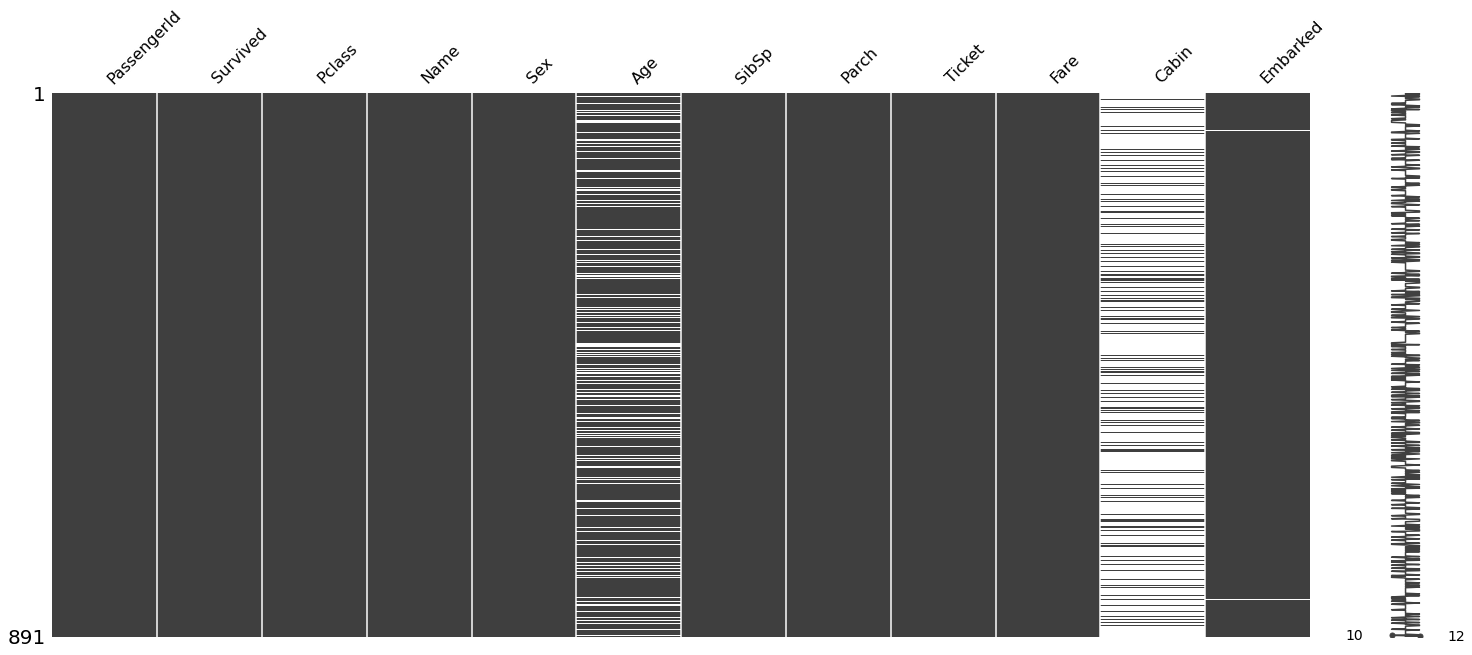

In [10]:
msno.matrix(titanic_data)

Age 열은 177개, Cabin 열은 687개, Embarked 열은 2개의 결측 데이터가 있음을 알 수 있다.

먼저 데이터 분석을 하는데 필요가 없다고 판단되는 Ticket과 Cabin 컬럼을 삭제한다.

In [11]:
#필요없는 변수 Ticket, Cabin을 삭제
titanic_data = titanic_data.drop(labels=['Ticket', 'Cabin'], axis=1)

> Age 컬럼은 결측치를 삭제하기에는 그 양이 많습니다.
>
> 그렇기 때문에, `median()`을 이용하여 중앙값으로 채우겠습니다.

In [12]:
#Age열의 결측치를 중앙값(median)으로 채움
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

#Embarked열의 결측치는 최빈값(mode)로 채움
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

데이터 클린징 결과 확인

In [13]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

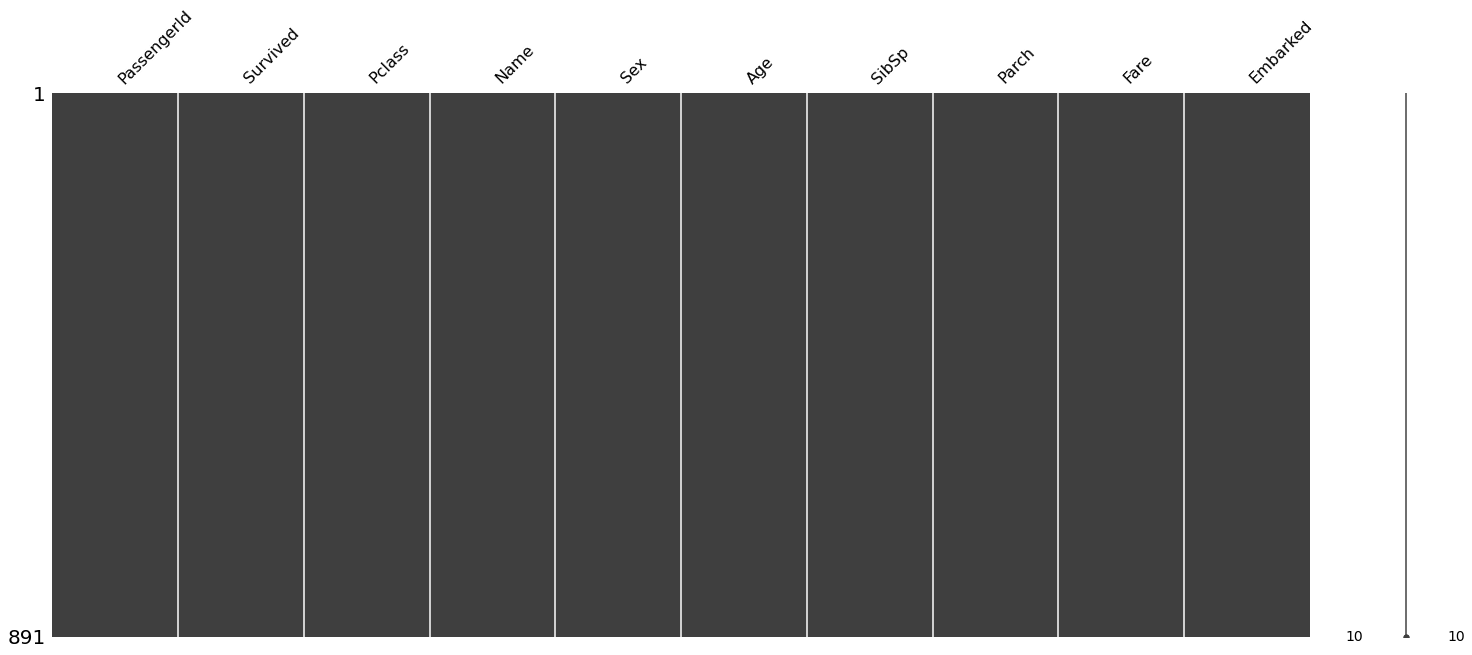

In [14]:
msno.matrix(titanic_data)

완벽하게 결측치를 제거한 것을 확인 할 수 있다.

그렇다면 이제 기존에 int형으로 되어 있지 않은 컬럼들을 int형으로 변환한다.

In [15]:
#Age, Embarked열을 int형으로 변환
titanic_data['Age'] = titanic_data['Age'].astype(np.int64)
titanic_data['Embarked'] = titanic_data['Embarked'].astype(np.int64)

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB


In [17]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28,1,2,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30.0000,0


변환이 필요하지 않은 Name열을 제외하고 object로 되어 있던 열을 int형으로 변환하였다.

## 4. 시각화

C:\Users\leeshble\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\leeshble\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\leeshble\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

<AxesSubplot:xlabel='Embarked', ylabel='count'>

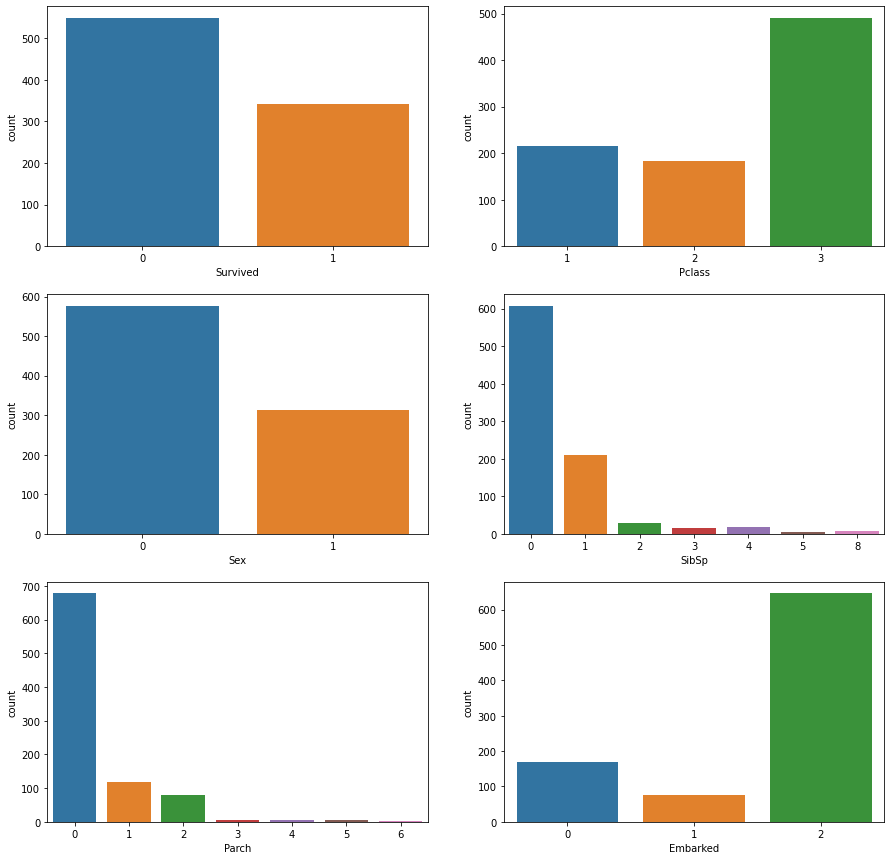

In [18]:
# 표를 2x2로 배열하고, 한 표당 15의 크기로 지정
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 15)

sns.countplot('Survived', data=titanic_data, ax=ax1)
sns.countplot('Pclass', data=titanic_data, ax=ax2)
sns.countplot('Sex', data=titanic_data, ax=ax3)
sns.countplot('SibSp', data=titanic_data, ax=ax4)
sns.countplot('Parch', data=titanic_data, ax=ax5)
sns.countplot('Embarked', data=titanic_data, ax=ax6)

위 표로 알 수 있는 사실
- 생존자가 더 많다.
- 남자가 여자보다 생존율이 더 높다.
- 3등급 티켓의 수가 가장 많다.
- 함께 탑승한 형제 또는 부모, 아이의 수가 없는 사람이 가장 많다.
- Southampton에서 탑승한 사람들의 수가 가장 많다.(타이타닉이 출발한 도시)

In [19]:
def bar_chart(feature):
    survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    dead = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

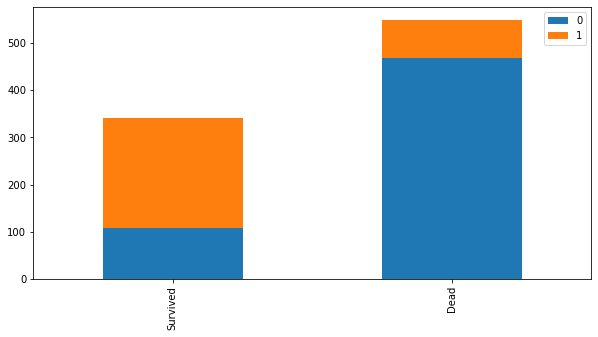

In [20]:
bar_chart('Sex')

여성보다 남성보다 더 생존률이 높다.

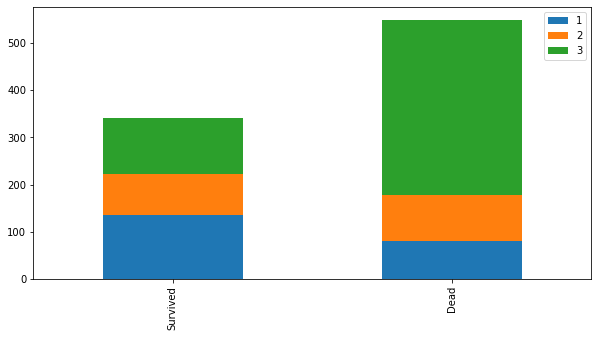

In [21]:
bar_chart('Pclass')

1등급 티켓 소유자가 생존률이 높고, 3등급 티켓 소유자는 사망 가능성이 매우 높다.

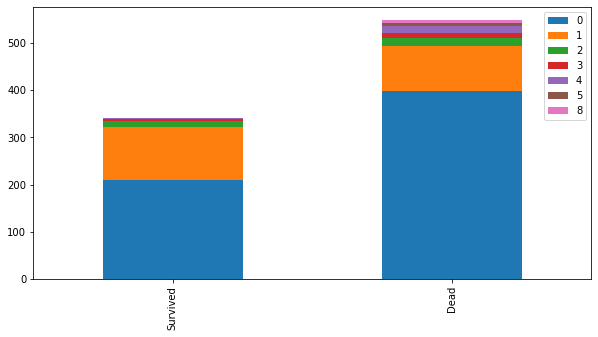

In [22]:
bar_chart('SibSp')

형제 및 배우자가 있는 사람들이 생존할 가능성이 더 높다.

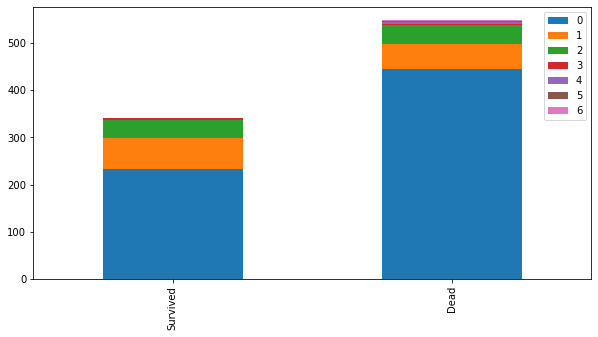

In [23]:
bar_chart('Parch')

부모나 자식이 있는 사람들이 생존 가능성이 더 높다.

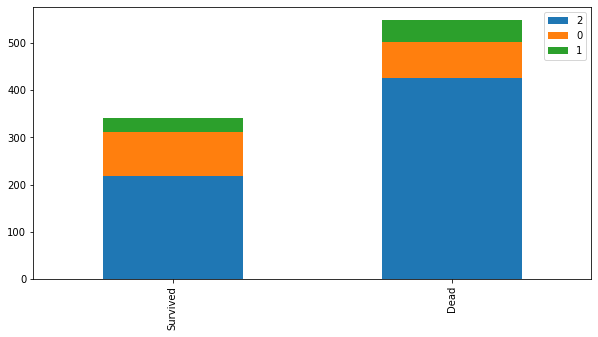

In [24]:
bar_chart('Embarked')

Cherbourg에서 탑승한 사람들이 생존자가 더 많다.
이 경우에서는 타이타닉 호의 첫 탑승지(Southampton)의 사망자는 더 많이 나왔다.

> 지금까지 데이터 분석 시각화 과정을 하였습니다.
>
> 이 과정을 한번 따라해 보고, 어떤 사람들이 더 생존할 확률이 높을지 예측하고, 결과를 가정하여 보세요.